# Metadata Extraction

In [2]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

dataset_path = "/media/rajendraprasath-m/New Volume/Projects/Final Year Project/Data/Video/EDA"
video_data = []

for cls in os.listdir(dataset_path):
    folder = os.path.join(dataset_path, cls)
    if not os.path.isdir(folder): continue
    
    print(f"Scanning {cls}...")
    for vid in tqdm(os.listdir(folder)):
        path = os.path.join(folder, vid)
        cap = cv2.VideoCapture(path)
        
        fps = cap.get(cv2.CAP_PROP_FPS)
        frame_count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
        width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
        height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
        
        # Get average brightness of the first frame
        ret, frame = cap.read()
        brightness = np.mean(frame) if ret else 0
        
        if fps > 0:
            duration = frame_count / fps
            video_data.append({
                'filename': vid,
                'class': cls,
                'duration': duration,
                'fps': fps,
                'total_frames': frame_count,
                'width': width,
                'height': height,
                'brightness': brightness
            })
        cap.release()

df = pd.DataFrame(video_data)

Scanning NonViolence...


100%|██████████| 1000/1000 [00:14<00:00, 69.09it/s]


Scanning Violence...


100%|██████████| 1000/1000 [00:21<00:00, 46.47it/s]


# Diagram 1: The "Data Balance" Pie Chart

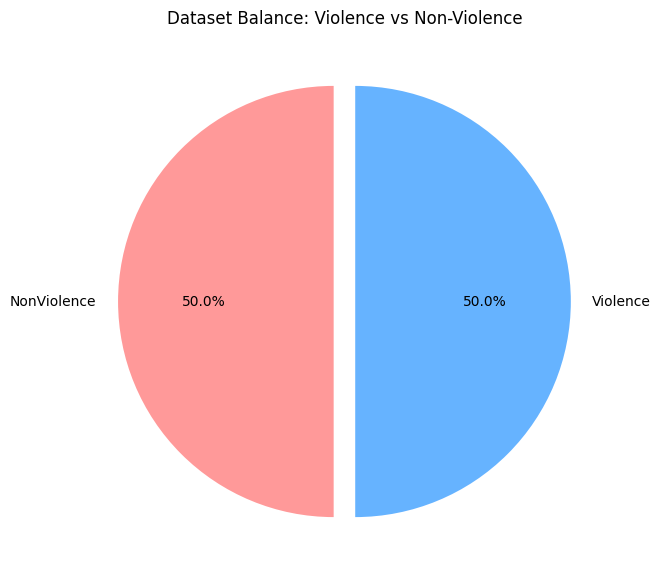

In [3]:
plt.figure(figsize=(7,7))
df['class'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=90, explode=(0.05, 0.05))
plt.title('Dataset Balance: Violence vs Non-Violence')
plt.ylabel('')
plt.show()

# Diagram 2: Temporal Density (KDE Plot)

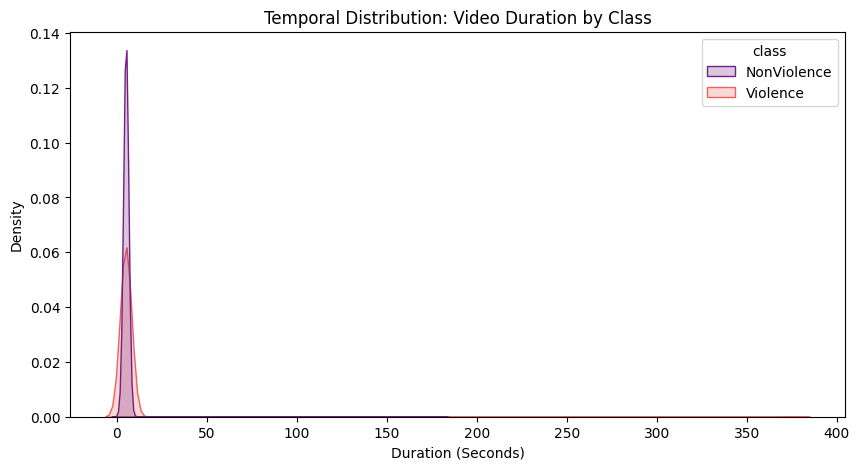

In [4]:
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x="duration", hue="class", fill=True, palette="magma")
plt.title('Temporal Distribution: Video Duration by Class')
plt.xlabel('Duration (Seconds)')
plt.show()

# Diagram 3: Visual Complexity (Brightness Violin Plot)


/tmp/ipykernel_209583/3911958702.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='class', y='brightness', data=df, palette="Set2")


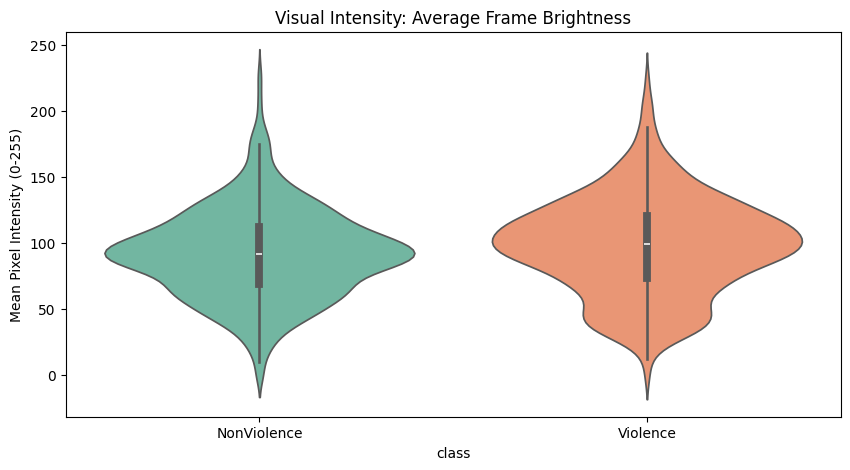

In [5]:
plt.figure(figsize=(10, 5))
sns.violinplot(x='class', y='brightness', data=df, palette="Set2")
plt.title('Visual Intensity: Average Frame Brightness')
plt.ylabel('Mean Pixel Intensity (0-255)')
plt.show()

# Diagram 4: Input Consistency (Scatter Plot of Resolutions)

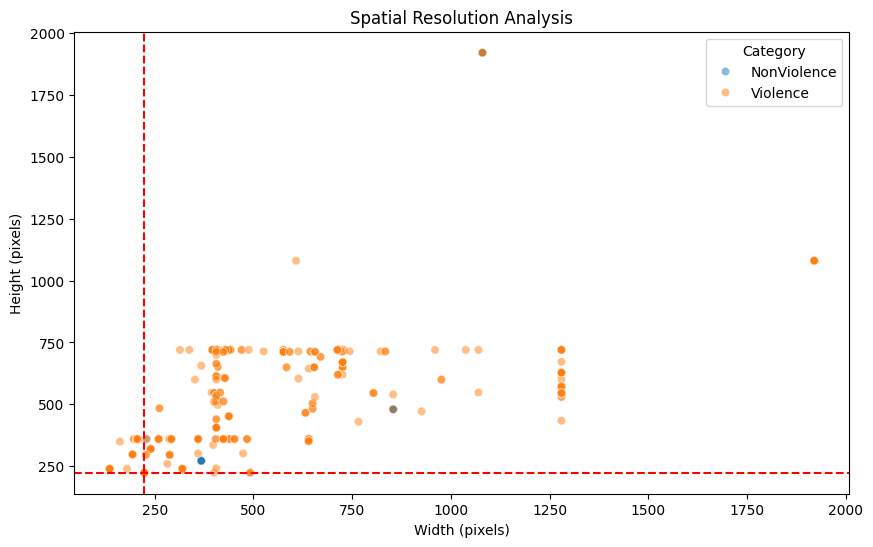

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="width", y="height", hue="class", alpha=0.5)
plt.axvline(224, color='red', linestyle='--')
plt.axhline(224, color='red', linestyle='--')
plt.title('Spatial Resolution Analysis')
plt.xlabel('Width (pixels)')
plt.ylabel('Height (pixels)')
plt.legend(title='Category', loc='upper right')
plt.show()

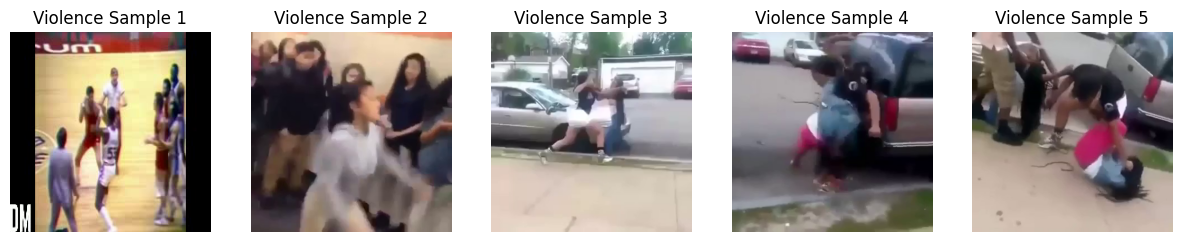

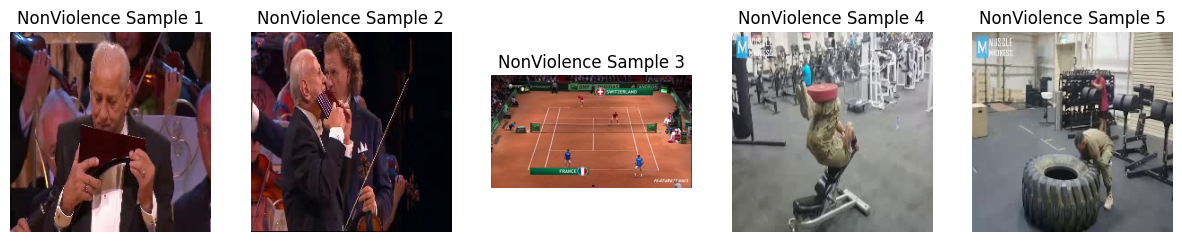

In [7]:
def show_samples(class_name, num_samples=5):
    folder = os.path.join(dataset_path, class_name)
    files = os.listdir(folder)[:num_samples]
    
    plt.figure(figsize=(15, 5))
    for i, file in enumerate(files):
        cap = cv2.VideoCapture(os.path.join(folder, file))
        ret, frame = cap.read() # Get first frame
        if ret:
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            plt.subplot(1, num_samples, i+1)
            plt.imshow(frame)
            plt.title(f"{class_name} Sample {i+1}")
            plt.axis('off')
        cap.release()
    plt.show()

show_samples('Violence')
show_samples('NonViolence')

In [39]:
import os
import cv2
import random
import time
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display, clear_output
import base64
from IPython.display import HTML, display
import ipywidgets as widgets
from IPython.display import display

# Path to your dataset
dataset_path = "/media/rajendraprasath-m/New Volume/Projects/Final Year Project/Data/Video/EDA"

def show_random_grid(class_name, num_samples=5):
    """Selects random videos and shows their first frame in a grid."""
    folder = os.path.join(dataset_path, class_name)
    all_files = [f for f in os.listdir(folder) if f.endswith(('.mp4', '.avi'))]
    
    # Randomly select files
    selected_files = random.sample(all_files, min(num_samples, len(all_files)))
    
    plt.figure(figsize=(20, 5))
    for i, file in enumerate(selected_files):
        cap = cv2.VideoCapture(os.path.join(folder, file))
        ret, frame = cap.read()
        if ret:
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            plt.subplot(1, num_samples, i+1)
            plt.imshow(frame)
            plt.title(f"Random {class_name}\n{file}", fontsize=8)
            plt.axis('off')
        cap.release()
    plt.show()

def play_one_random_video(class_name):
    folder = os.path.join(dataset_path, class_name)
    
    # 1. Check if folder exists
    if not os.path.exists(folder):
        print(f"❌ Error: Folder NOT found at {folder}")
        print(f"Check if the name is exactly '{class_name}' (Case Sensitive!)")
        return

    # 2. Get list of files (handle .mp4 and .MP4)
    all_files = [f for f in os.listdir(folder) if f.lower().endswith('.mp4')]
    
    # Debug: Print how many files were found
    print(f"🔍 Found {len(all_files)} MP4 files in {class_name}")

    if not all_files:
        # Check if they are actually .avi files (which won't work in browser)
        avi_files = [f for f in os.listdir(folder) if f.lower().endswith('.avi')]
        if avi_files:
            print(f"⚠️ Warning: Found {len(avi_files)} .avi files. Browsers cannot play .avi directly. They must be .mp4.")
        else:
            print(f"❌ No video files found in {folder}")
        return

    # 3. Pick exactly ONE random file
    selected_file = random.choice(all_files)
    video_path = os.path.join(folder, selected_file)
    print(f"✅ Selected File: {selected_file}")

    # 4. Read the video file and convert to base64
    try:
        with open(video_path, "rb") as f:
            video_blob = f.read()
            video_base64 = base64.b64encode(video_blob).decode()

        # 5. Generate the HTML5 code
        video_html = f'''
        <div style="border: 3px solid #238636; padding: 15px; border-radius: 12px; background: #161b22; width: 640px; margin: 10px 0;">
            <h3 style="color: #2ea043; font-family: sans-serif; margin-top: 0;">🎬 Displaying {class_name}: {selected_file}</h3>
            <video width="640" height="360" controls autoplay muted loop>
                <source src="data:video/mp4;base64,{video_base64}" type="video/mp4">
                Your browser does not support the video tag.
            </video>
        </div>
        '''
        display(HTML(video_html))
    except Exception as e:
        print(f"❌ Error encoding video: {e}")


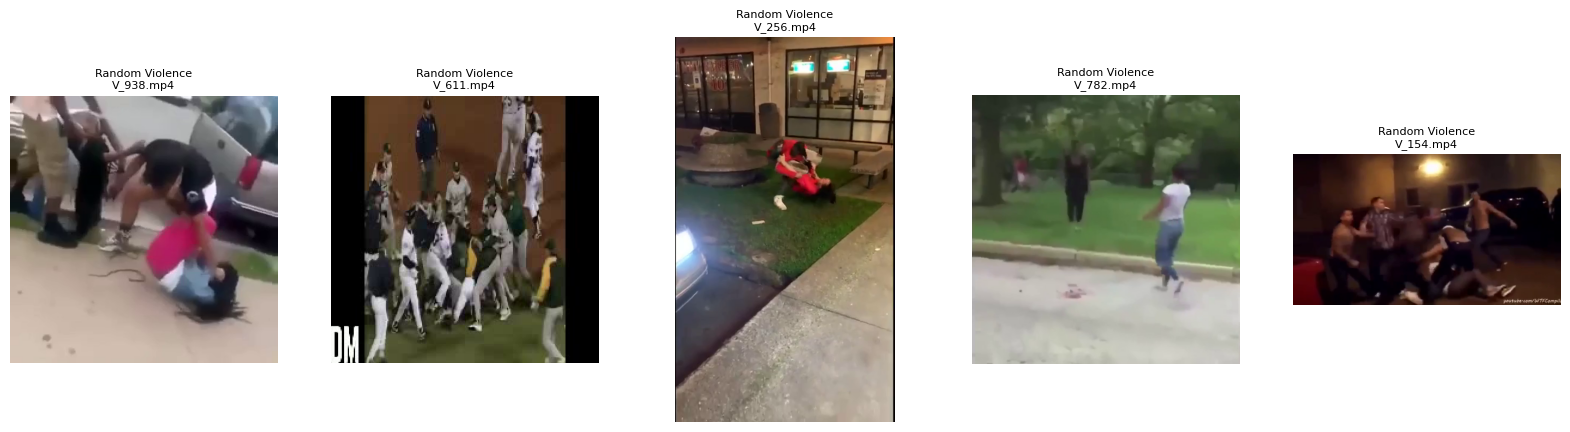

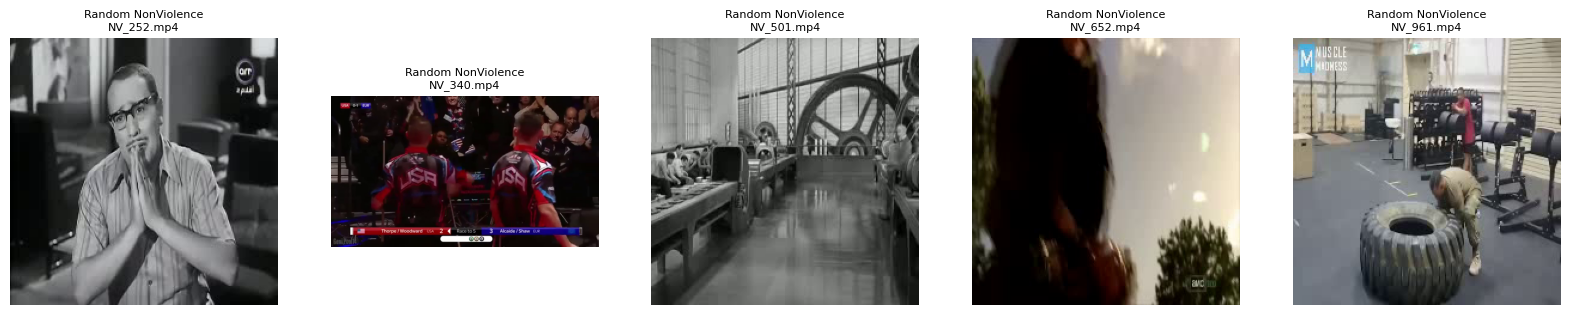

In [40]:
show_random_grid('Violence')
show_random_grid('NonViolence')

In [49]:
play_one_random_video('Violence')


🔍 Found 1000 MP4 files in Violence
✅ Selected File: V_512.mp4


In [81]:
play_one_random_video('NonViolence')

🔍 Found 1000 MP4 files in NonViolence
✅ Selected File: NV_312.mp4


In [12]:
# The "Engineering" behind the pipeline
def preprocess_frame(frame):
    # Spatial Standardization
    frame = cv2.resize(frame, (224, 224))
    # Color Conversion
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    # Pixel Normalization
    tensor = frame.astype('float32') / 127.5 - 1.0
    return tensor